### Riddler Express:

From Lucas Jaeger comes a “flute-iful” challenge:

You’re a contestant on the hit new game show, “You Bet Your Fife.” On the show, a random real number (i.e., decimals are allowed) is chosen between 0 and 100. Your job is to guess a value that is less than this randomly chosen number. Your reward for winning is a novelty fife that is valued precisely at your guess. For example, if the number is 75 and you guess 5, you’d win a \\$5 fife, but if you’d guessed 60, you’d win a \\$60 fife. Meanwhile, a guess of 80 would win you nothing.

What number should you guess to maximize the average value of your fifing winnings?

### Process:

- Search over a series of games for the expecting earnings of values 0 - 100 in increments of 0,01 (10K total)
- Using `numpy array` allows for speed-ups:
    - `np.where()` can be used for vectorized operation to see if guessed value is less than chosen number
    - speed up fluctuates, but tends to be 80-100x 

In [1]:
import random 
from collections import defaultdict
import matplotlib.pyplot as plt
import numpy as np

# params
min_g = 0
max_g = 100

# let's limit to decimal
guess_arr = np.arange(0,100.01, 0.01)
print(f"Range of guesses: {guess_arr[0]}-{guess_arr[-1]}")

# total sims
n = 1000

Range of guesses: 0.0-100.0


In [2]:
import time

# Do a quick timing test
start = time.time()

# build out a solution set size of guess_arr, but all 0s to start
solution_set = np.zeros(guess_arr.size)

for _ in range(n):
    
    # randomly choose a float between 0 - 100
    chosen_num = round(random.uniform(0,100),1)

    # determine winnings across each guess
    int_solution = np.where(guess_arr < chosen_num, guess_arr, 0)
    
    # add solution to final solution
    solution_set = solution_set + int_solution

end = time.time()

# confirm size of solution & search array are the same
assert(solution_set.size == guess_arr.size)

# go through & determine highest winnings 
max_val = [0,0]
for index, val in np.ndenumerate(solution_set):
    if val > max_val[0]:
        max_val[0] = val
        max_val[1] = guess_arr[index]  # can map back to original guess_array
print(f"Total simulations: {n}")
print(f"Total time: {end - start}")
print(f"Highest winnings occur at {max_val[1]} with an average of {max_val[0] / n:.2f}")
print("\n")

Total simulations: 1000
Total time: 0.026868820190429688
Highest winnings occur at 50.69 with an average of 25.55




### Iterate Through Varying Sample Sizes:

Try various amounts from 10,000 - 10,000,000

In [3]:
sample_list = [10000,100000,1000000,2000000,5000000,10000000]

for n in sample_list:
    # Do a quick timing test
    start = time.time()

    # build out a solution set size of guess_arr, but all 0s to start
    solution_set = np.zeros(guess_arr.size)

    for _ in range(n):

        # randomly choose a float between 0 - 100
        chosen_num = round(random.uniform(0,100),1)

        # determine winnings across each guess
        int_solution = np.where(guess_arr < chosen_num, guess_arr, 0)

        # add solution to final solution
        solution_set = solution_set + int_solution

    end = time.time()

    # confirm size of solution & search array are the same
    assert(solution_set.size == guess_arr.size)

    # go through & determine highest winnings 
    max_val = [0,0]
    for index, val in np.ndenumerate(solution_set):
        if val > max_val[0]:
            max_val[0] = val
            max_val[1] = guess_arr[index]  # can map back to original guess_array
    print(f"Total simulations: {n}")
    print(f"Total time: {end - start}")
    print(f"Highest winnings occur at {max_val[1]} with an average of {max_val[0] / n:.2f}")
    print("\n")

Total simulations: 10000
Total time: 0.2675015926361084
Highest winnings occur at 49.89 with an average of 25.19


Total simulations: 100000
Total time: 3.8821604251861572
Highest winnings occur at 50.69 with an average of 25.08


Total simulations: 1000000
Total time: 30.39916491508484
Highest winnings occur at 49.99 with an average of 25.00


Total simulations: 2000000
Total time: 56.3519024848938
Highest winnings occur at 50.09 with an average of 25.02


Total simulations: 5000000
Total time: 139.09955406188965
Highest winnings occur at 49.99 with an average of 25.02


Total simulations: 10000000
Total time: 276.00557351112366
Highest winnings occur at 50.09 with an average of 25.03




### Visualization: 

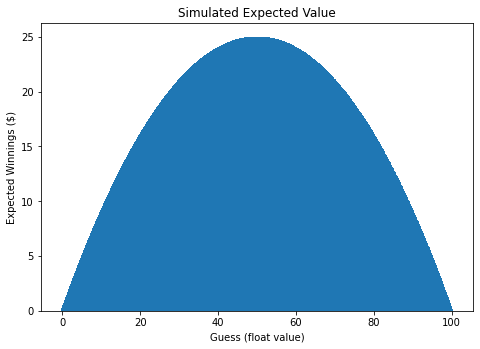

In [4]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(guess_arr,solution_set / n)
plt.title("Simulated Expected Value")
plt.ylabel("Expected Winnings ($)")
plt.xlabel("Guess (float value)")
plt.show()

### Simulation Solution:

The answer would be 50. I should bet \\$50.

### Analytical Solution: 

